In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

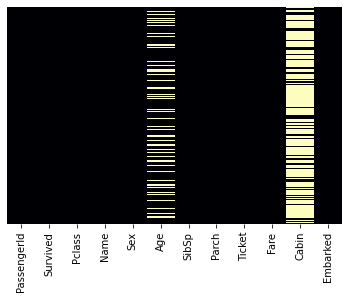

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap= 'magma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

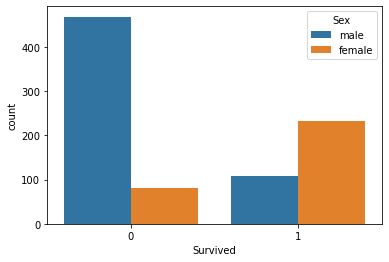

In [5]:
sns.countplot(x='Survived',data=train,hue = 'Sex')

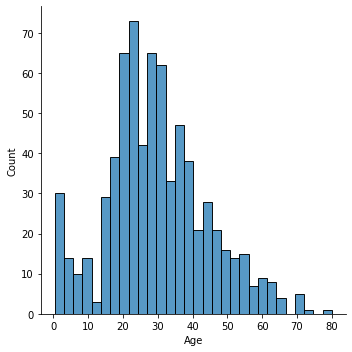

In [6]:
sns.displot(train['Age'].dropna(),bins=30)

In [7]:
train['Fare'].iplot(kind='hist')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

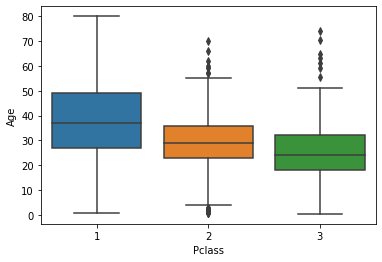

In [8]:
sns.boxplot(x = 'Pclass',y='Age',data = train)

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else :
         return Age

In [10]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis= 1)

In [11]:
train.drop('Cabin',axis = 1, inplace = True)

In [12]:
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [13]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [14]:
train = pd.concat([train,sex,embark], axis = 1)
# train.drop('male',inplace = True)

In [18]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [17]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1, inplace = True)

In [20]:
X = train.drop('Survived',axis = 1)

In [22]:
y = train['Survived']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression

In [29]:
logModel = LogisticRegression(max_iter = 10000)

In [30]:
logModel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [33]:
pred = logModel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

